# Ford Gobike Tripdata 2017
## by Deepesh Malhotra

> This is Ford Gobike Trip dataset of 2017 which tells us about the details of the user when they chooses to ride with them like staion_name ,destination_name ,duration etc.

In [111]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [112]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()
#print(df.shape)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [7]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

### What is the structure of your dataset?

> Our dataset contains 519700 rows and 13 columns

### What is/are the main feature(s) of interest in your dataset?

- 1. Does season affects the duration of rides..?
- 2. What are the differences in the behaviour of customer and subscriber..?
- 3. What is the average duration of each trip..?
- 4. Any particular station from where more rides taking place..?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Start_time column can help me in getting the answer of first question.
- We have a user_type variable which can help us in answering second question.
- Through duration variable i can find the average duration of each trip.
- station_id and start_station_name can help in finding the answer of last qusetion.

## Univariate Exploration

In [113]:
# I have divided the dataset to observe the rides in summer and winter. Considering winter starts from 1st october.
df_sum=df[df.start_time>='2017-10-01']
df_wint=df[df.start_time<'2017-10-01']

In [118]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [65]:
df.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

Text(0.5, 0, 'Duration in seconds')

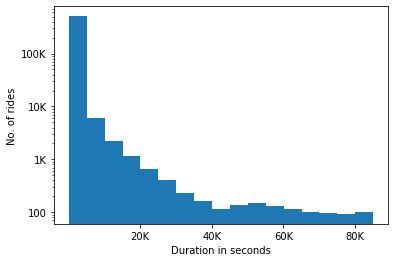

In [171]:
bins=np.arange(60, df.duration_sec.max(), 5000)
plt.hist(df.duration_sec, bins=bins);
plt.yscale('log')
plt.yticks([10**2,10**3,10**4,10**5],['100','1K','10K','100K'])
plt.xticks([20000,40000,60000,80000],['20K','40K','60K','80K'])
plt.ylabel('No. of rides')
plt.xlabel('Duration in seconds')

 >As we can see that majority of users have a duartion less than 10000 seconds but for other users their duration is not clearly visible as we have lots of data so it's better to use log scale on y-axis so that we can see the observation more clearly.

>After applying the scales now we can clearly see that majority of them are having a duration less than 10000 sec while around 100 of users are having a duration around 80000 secs and also more than that. 

In [139]:
u=df.groupby('user_type').size()
u

user_type
Customer      110470
Subscriber    409230
dtype: int64

In [141]:
# We divide the dataset into summer season(df_sum) and winter season(df_wint) considering winter starts from 2017-10-01 as 
#season can affect the duration of rides.
v=df_sum.groupby('user_type').size()
v

user_type
Customer       50347
Subscriber    240741
dtype: int64

In [142]:
x=df_wint.groupby('user_type').size()
x

user_type
Customer       60123
Subscriber    168489
dtype: int64

Text(0.5, 0, 'Winter Season')

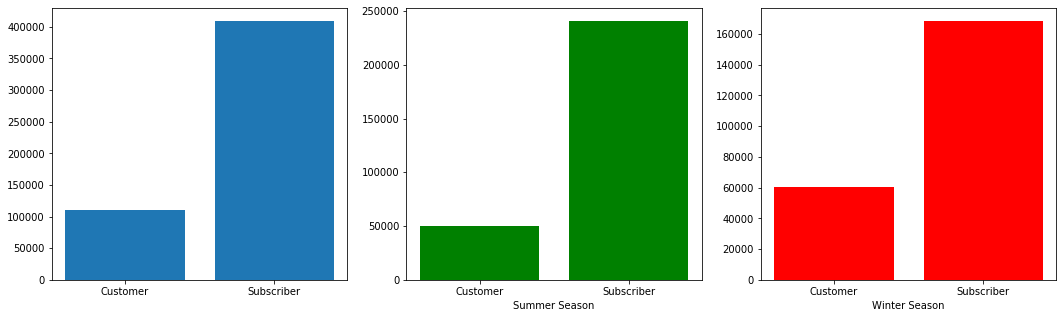

In [147]:
# for general data
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
location=[1,2]
height=[u[0],u[1]]
labels=['Customer','Subscriber']
plt.bar(location, height, tick_label=labels)

# for summer season
plt.subplot(1,3,2)
location=[1,2]
height=[v[0],v[1]]
labels=['Customer','Subscriber']
plt.bar(location, height,color='g' ,tick_label=labels)
plt.xlabel('Summer Season')

# for winter season
plt.subplot(1,3,3)
location=[1,2]
height=[x[0],x[1]]
labels=['Customer','Subscriber']
plt.bar(location, height,color='r',tick_label=labels)
plt.xlabel('Winter Season')

> From the visual we can see that subscriber count is nearly 4 times that of customers in summers while it is slightly greater than 2 times in winter .Through this observation we will see how this will affects the rides.

> As other categorical values like start_station_name have around 200 entries so it is not good to plot them using bar graph as this will create a mess.It is shown below..

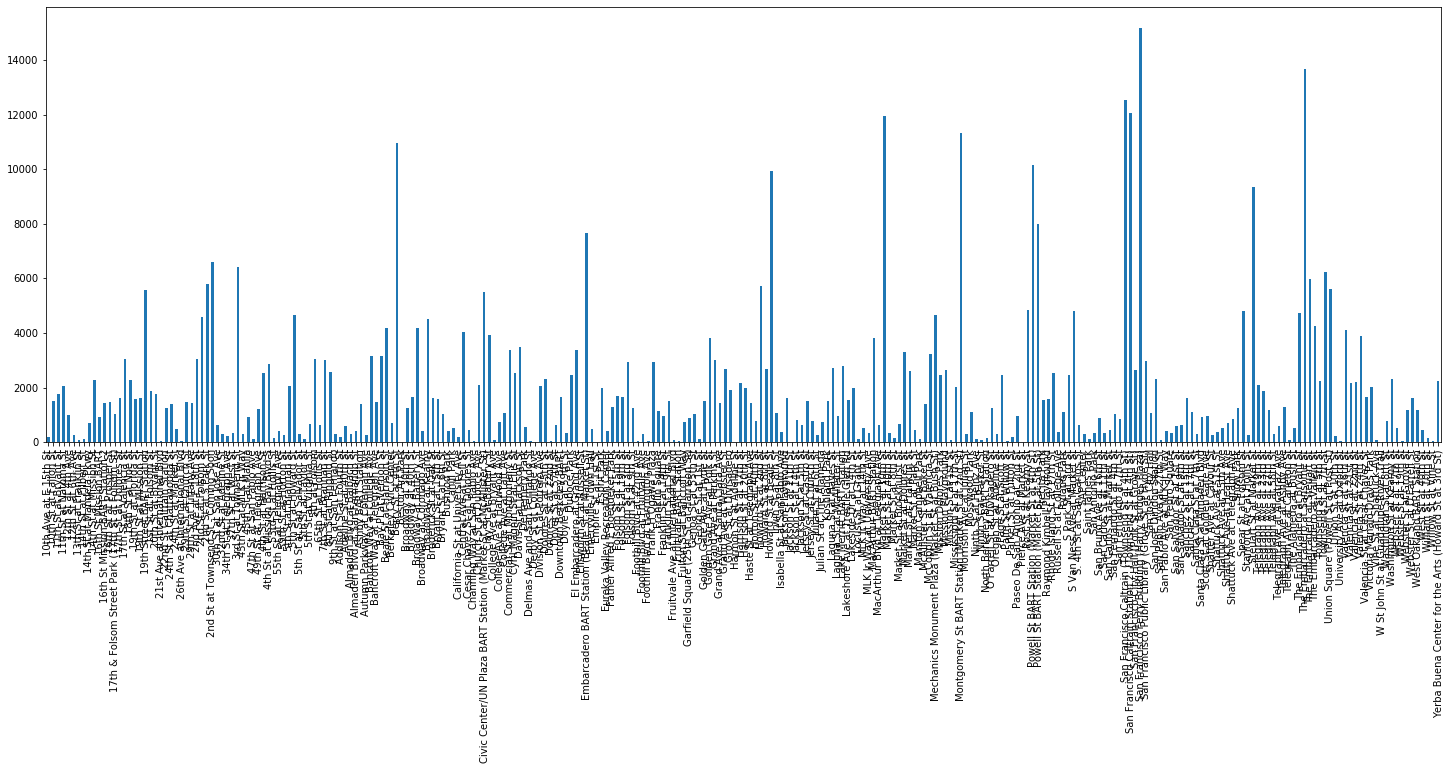

In [85]:
c=df.start_station_name.value_counts().sort_index()
c.plot.bar(figsize=(25,8))

> As mentioned plotting start_station_name resluted in a mess as it has too many categories to plot.Let's look at some bivariate relationships now.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- From user_type variable we saw that no. of subscribers are 4 times that of normal customers in summers and greater than 2 times in winter.In this i didn't find any unusual point so it didn't require any transformation.

- In the duration column we can see due to so many values no. of rides greater than 10000 secs duration are not clearly visible so we perform transformation on y-axis and using yscale('log') we were now able to see other higher duration rides also. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I didn't find any unusual distribution in the above variables and also they didn't require any additional operation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

([<matplotlib.axis.YTick at 0x2269e494f08>,
 <a list of 4 Text yticklabel objects>)

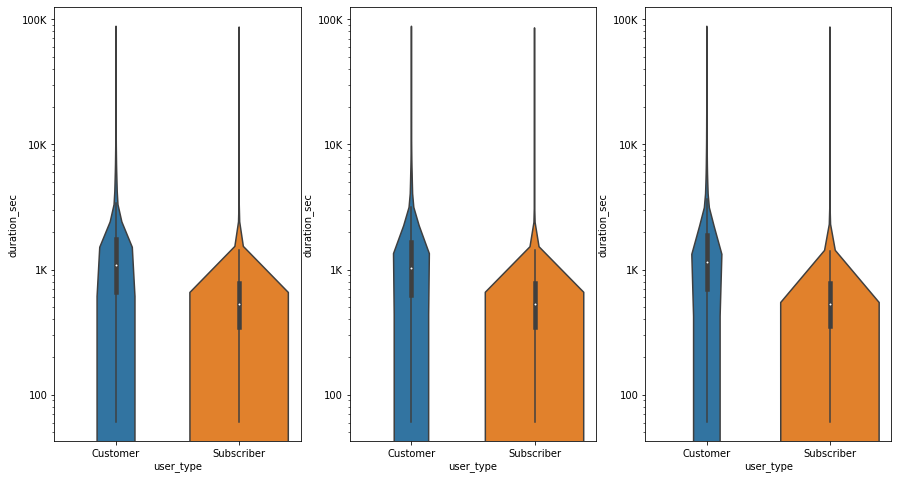

In [175]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.yscale('log')
sb.violinplot(data=df, x='user_type', y='duration_sec')
plt.yticks([10**2,10**3,10**4,10**5],['100','1K','10K','100K'])

# summer season
plt.subplot(1,3,2)
plt.yscale('log')
sb.violinplot(data=df_sum, x='user_type', y='duration_sec')
plt.yticks([10**2,10**3,10**4,10**5],['100','1K','10K','100K'])

# winter season
plt.subplot(1,3,3)
plt.yscale('log')
sb.violinplot(data=df_wint, x='user_type', y='duration_sec')
plt.yticks([10**2,10**3,10**4,10**5],['100','1K','10K','100K'])

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Through the above relationship we find that in winters people are taking rides for a longer duration as compared to summer and it is quite obvious.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No i didn't find any other relationships between other features.

## Multivariate Exploration

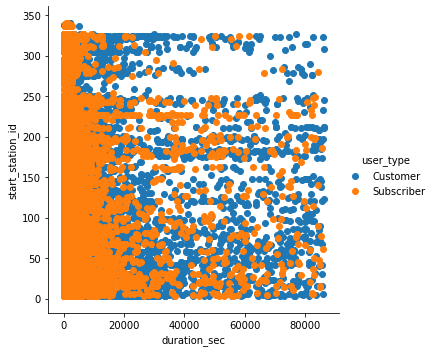

In [168]:
g=sb.FacetGrid(data=df, hue='user_type', size=5)
g.map(plt.scatter, 'duration_sec', 'start_station_id')
g.add_legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- From the above plot we see that more rides are taken from 0 to 50 station_id.
- Subsribers tend to have shorter rides as compared to customers.

### Were there any interesting or surprising interactions between features?

- Surprising is that subscriber should have longer rides as they are subscribers of the company so they should have trust on them and hence for longer rides they should go with them but it is seen that subscribers are using the service more for shorter rides.